# Régression Linéaire

Solution exacte - OLS


In [16]:
from sklearn.datasets import make_regression
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Régression - 10 échantillons - 2 variables

In [12]:

# example simple 10 echantillons , 2 predicteurs
X, y = make_regression(n_samples=10, n_features=2)

# OLS, moindre carrés
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# prediction
yhat = X[:, 0]* beta[0] + X[:,1] * beta[1]

# erreur residuelle
e = y - yhat

print("l'erreur résiduelle moyenne est {:.4f} ".format(np.mean(y-yhat)))



l'erreur résiduelle moyenne est 0.0000 


# 2. Régression 100k échantillons, 1000 variables

In [13]:
# maintenant le meme exemple avcec un autre ordre de grandeur
N = 100000
M = 1000
X, y = make_regression(n_samples=N, n_features=M)
t = time()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Calcul fait en {:.2f}s".format( (time() -t) ))

# prediction
yhat = [0 for i in range(N)]
for k in range(M):
    yhat += X[:, k]* beta[k]

# erreur residuelle
e = y - yhat

print("l'erreur résiduelle moyenne est {:.4f} ".format(np.mean(y-yhat)))



Calcul fait en 2.63s
l'erreur résiduelle moyenne est 0.0000 


# 3. On rajoute du bruit


Calcul fait en 0.00s
l'erreur résiduelle moyenne est 1.5649 


Text(0.5,1,'Résidus')

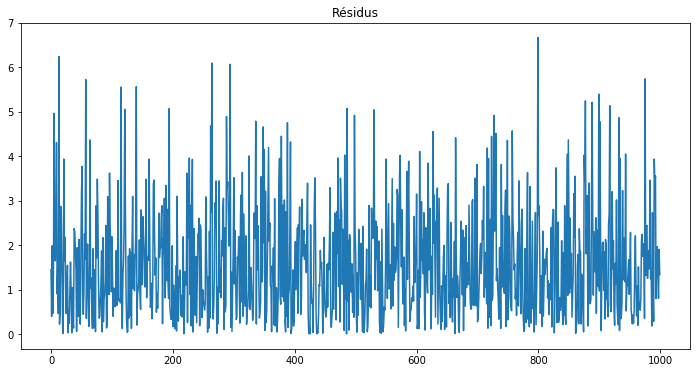

In [21]:
# maintenant avec du bruit gaussien de variance 10
N = 1000
M = 10

X, y = make_regression(n_samples=N, n_features=M, noise =10)
t = time()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Calcul fait en {:.2f}s".format( (time() -t) ))

# prediction
yhat = [0 for i in range(N)]
for k in range(M):
    yhat += X[:, k]* beta[k]

# erreur residuelle
e = np.abs(y - yhat)

print("l'erreur résiduelle moyenne est {:.4f} ".format(np.mean(e)))

fig, ax = plt.subplots(1,1, figsize=(12,6))
plt.plot(e)
plt.title('Résidus')